### Combine all annotations on full UMAP
- all compartments are now annotated at fine grained resolution, combine annotations from csv

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sc.logging.print_header()

scanpy==1.7.1 anndata==0.8.0 umap==0.4.6 numpy==1.20.1 scipy==1.6.1 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [2]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.stringent_doublet_removed.hvg7500_noCC.scvi_output.lv20_batch256.with_broad_annotation.20220917.with_countlayers.20221124.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 1246039 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [4]:
adata.obs.broad_annot_20220917.value_counts()

Epithelial        475462
Mesenchymal       277891
T and NK cells    192786
B and B plasma    179332
Endothelial        58948
Myeloid            37393
Neural             24227
Name: broad_annot_20220917, dtype: int64

In [5]:
a = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/B_annot_v3.csv',index_col=0)
b = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Endo_annot_v3.csv',index_col=0)
c = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Epi_all_annot_v3.csv',index_col=0)
d = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Mes_all_annot_v3.csv',index_col=0)
e = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Myeloid_annot_v3.csv',index_col=0)
f = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v4/csv/T_annotv4.csv',index_col=0)

In [6]:
f.annot_v4.value_counts()

Trm_CD4          26269
Tnaive/cm_CD4    24797
Trm_CD8          24711
Trm/em_CD8       16334
Trm_Th17         14688
gdT              13986
Treg_IL10        10299
Tfh_naive         9303
Tfh               6910
Treg              5500
Tnaive/cm_CD8     5399
ILC3              4676
NK_CD56bright     4479
gdT_naive         3009
NK_CD16           2327
MAIT              2073
T/NK_cycling      1423
Doublets          1023
Name: annot_v4, dtype: int64

In [7]:
#Not enough doublets from T cells - the rest are in annot_v3
t_doublets = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/T_annot_v3.csv',index_col=0)

In [8]:
f

,annot_v4
index,
AAGACAAAGAAGTATC-GSM4600896,Treg_IL10
ACTCTCGTCTCCTGTG-GSM4600896,Trm/em_CD8
ATGAAAGCATAACGGG-GSM4600896,Treg_IL10
ATGCCTCCACAACGTT-GSM4600896,Trm_Th17
ATGCCTCTCAATCTCT-GSM4600896,Trm_Th17
...,...
TTTGCGCGTGAGGGTT-GSM5525958,Trm_CD4
TTTGCGCTCCAAAGTC-GSM5525958,Tnaive/cm_CD4
TTTGCGCTCGAATGCT-GSM5525958,Trm_CD4


In [9]:
f = f.rename(columns={'annot_v4': 'annot_v3'})

In [10]:
f

,annot_v3
index,
AAGACAAAGAAGTATC-GSM4600896,Treg_IL10
ACTCTCGTCTCCTGTG-GSM4600896,Trm/em_CD8
ATGAAAGCATAACGGG-GSM4600896,Treg_IL10
ATGCCTCCACAACGTT-GSM4600896,Trm_Th17
ATGCCTCTCAATCTCT-GSM4600896,Trm_Th17
...,...
TTTGCGCGTGAGGGTT-GSM5525958,Trm_CD4
TTTGCGCTCCAAAGTC-GSM5525958,Tnaive/cm_CD4
TTTGCGCTCGAATGCT-GSM5525958,Trm_CD4


In [11]:
t_doublets

,annot_v2,annot_v3
index,,
AAGACAAAGAAGTATC-GSM4600896,Tregs.IL10+,Treg_IL10+
ACTCTCGTCTCCTGTG-GSM4600896,CD8Teff,Tem_CD8
ATGAAAGCATAACGGG-GSM4600896,CD8Teff,Tem_CD8
ATGCCTCCACAACGTT-GSM4600896,Th17.Trm,Trm_Th17
ATGCCTCTCAATCTCT-GSM4600896,Th17.Trm,Trm_Th17
...,...,...
TTTGCGCGTGAGGGTT-GSM5525958,CD4mem,Trm_CD4
TTTGCGCTCCAAAGTC-GSM5525958,CD4naive,Tnaive_CD4
TTTGCGCTCGAATGCT-GSM5525958,CD4mem,Trm_CD4


In [12]:
t = t_doublets[t_doublets.annot_v3.isin(['Doublets'])].copy()

In [13]:
t

,annot_v2,annot_v3
index,,
TATATCCAGCCATTCA-GSM4600896,Doublets,Doublets
TCCATCGAGCATCCTA-GSM4600896,CD4mem,Doublets
ACGATCAAGATTGATG-GSM4600897,Doublets,Doublets
ACTTTGTGTCACAGTT-GSM4600897,Doublets,Doublets
AGTAGTCCAGCAATTC-GSM4600897,Doublets,Doublets
...,...,...
TGCCAAAAGCGAGAAA-GSM5525958,Doublets,Doublets
TGCCAAATCGTTACAG-GSM5525958,Doublets,Doublets
TGCCCATAGTTATCGC-GSM5525958,Doublets,Doublets


In [14]:
del t['annot_v2']

In [15]:
c

,annot_v3_epi,annot_v3,annot_v3_epi_simple
index,,,
AACAAGACAGGACATG-GSM4600896,basal,Oral_basal,basal
AACCATGTCATGCCAA-GSM4600896,basal,Oral_basal,basal
AACCCAAAGGCCTGCT-GSM4600896,basal,Oral_basal,basal
AATGACCCAAGAGGCT-GSM4600896,basal,Oral_basal,basal
ACATCGAAGACATGCG-GSM4600896,cycling_G2M,Oral_cycling_G2M,cycling
...,...,...,...
TGAAAGAGTGCCTGTG-GSM5525958,Doublets,Doublets,Doublets
TGCGGGTAGCCAGTAG-GSM5525958,Doublets,Doublets,Doublets
TGGCGCACAGATAATG-GSM5525958,TA_cycling,LI_AP_TA_cycling,TA_cycling


In [16]:
c = c.rename(columns={'annot_v3': 'annot_v3_old'})

In [17]:
c

,annot_v3_epi,annot_v3_old,annot_v3_epi_simple
index,,,
AACAAGACAGGACATG-GSM4600896,basal,Oral_basal,basal
AACCATGTCATGCCAA-GSM4600896,basal,Oral_basal,basal
AACCCAAAGGCCTGCT-GSM4600896,basal,Oral_basal,basal
AATGACCCAAGAGGCT-GSM4600896,basal,Oral_basal,basal
ACATCGAAGACATGCG-GSM4600896,cycling_G2M,Oral_cycling_G2M,cycling
...,...,...,...
TGAAAGAGTGCCTGTG-GSM5525958,Doublets,Doublets,Doublets
TGCGGGTAGCCAGTAG-GSM5525958,Doublets,Doublets,Doublets
TGGCGCACAGATAATG-GSM5525958,TA_cycling,LI_AP_TA_cycling,TA_cycling


In [18]:
c = c.rename(columns={'annot_v3_epi': 'annot_v3'})

In [19]:
c

,annot_v3,annot_v3_old,annot_v3_epi_simple
index,,,
AACAAGACAGGACATG-GSM4600896,basal,Oral_basal,basal
AACCATGTCATGCCAA-GSM4600896,basal,Oral_basal,basal
AACCCAAAGGCCTGCT-GSM4600896,basal,Oral_basal,basal
AATGACCCAAGAGGCT-GSM4600896,basal,Oral_basal,basal
ACATCGAAGACATGCG-GSM4600896,cycling_G2M,Oral_cycling_G2M,cycling
...,...,...,...
TGAAAGAGTGCCTGTG-GSM5525958,Doublets,Doublets,Doublets
TGCGGGTAGCCAGTAG-GSM5525958,Doublets,Doublets,Doublets
TGGCGCACAGATAATG-GSM5525958,TA_cycling,LI_AP_TA_cycling,TA_cycling


In [20]:
d = d.rename(columns={'annot_v3':'annot_v3_old'})

In [21]:
d

,annot_v3_mes,annot_v3_old,annot_v3_mes_simple
index,,,
AAGCATCCACTCCACT-GSM4600896,crypt_fibroblast_PI16,Mes_AP_crypt_fibroblast_PI16,crypt_fibroblast_PI16
AATGCCACAGAAACCG-GSM4600896,crypt_fibroblast_PI16,Mes_AP_crypt_fibroblast_PI16,crypt_fibroblast_PI16
AATGGAATCGGCTGAC-GSM4600896,vascular_smooth_muscle,Mes_AP_vascular_smooth_muscle,vascular_smooth_muscle
AATGGCTCACTGCTTC-GSM4600896,lamina_propria_fibroblast_ADAMDEC1,Mes_AP_lamina_propria_fibroblast_ADAMDEC1,lamina_propria_fibroblast_ADAMDEC1
ACCAACAGTTTGAAAG-GSM4600896,lamina_propria_fibroblast_ADAMDEC1,Mes_AP_lamina_propria_fibroblast_ADAMDEC1,lamina_propria_fibroblast_ADAMDEC1
...,...,...,...
TTCTCCTGTCAGAGGT-GSM5525958,crypt_fibroblast_PI16,Mes_AP_crypt_fibroblast_PI16,crypt_fibroblast_PI16
TTCTTAGCAGACGTAG-GSM5525958,lamina_propria_fibroblast_ADAMDEC1,Mes_AP_lamina_propria_fibroblast_ADAMDEC1,lamina_propria_fibroblast_ADAMDEC1
TTGGAACTCATCGATG-GSM5525958,villus_fibroblast_F3,Mes_AP_villus_fibroblast_F3,villus_fibroblast_F3


In [22]:
d = d.rename(columns={'annot_v3_mes_simple':'annot_v3'})

In [23]:
d

,annot_v3_mes,annot_v3_old,annot_v3
index,,,
AAGCATCCACTCCACT-GSM4600896,crypt_fibroblast_PI16,Mes_AP_crypt_fibroblast_PI16,crypt_fibroblast_PI16
AATGCCACAGAAACCG-GSM4600896,crypt_fibroblast_PI16,Mes_AP_crypt_fibroblast_PI16,crypt_fibroblast_PI16
AATGGAATCGGCTGAC-GSM4600896,vascular_smooth_muscle,Mes_AP_vascular_smooth_muscle,vascular_smooth_muscle
AATGGCTCACTGCTTC-GSM4600896,lamina_propria_fibroblast_ADAMDEC1,Mes_AP_lamina_propria_fibroblast_ADAMDEC1,lamina_propria_fibroblast_ADAMDEC1
ACCAACAGTTTGAAAG-GSM4600896,lamina_propria_fibroblast_ADAMDEC1,Mes_AP_lamina_propria_fibroblast_ADAMDEC1,lamina_propria_fibroblast_ADAMDEC1
...,...,...,...
TTCTCCTGTCAGAGGT-GSM5525958,crypt_fibroblast_PI16,Mes_AP_crypt_fibroblast_PI16,crypt_fibroblast_PI16
TTCTTAGCAGACGTAG-GSM5525958,lamina_propria_fibroblast_ADAMDEC1,Mes_AP_lamina_propria_fibroblast_ADAMDEC1,lamina_propria_fibroblast_ADAMDEC1
TTGGAACTCATCGATG-GSM5525958,villus_fibroblast_F3,Mes_AP_villus_fibroblast_F3,villus_fibroblast_F3


In [24]:
del c['annot_v3_old']

In [25]:
del c['annot_v3_epi_simple']

In [26]:
del d['annot_v3_old']

In [27]:
del d['annot_v3_mes']

In [28]:
del b['annot_v2']

In [29]:
del a['annot_v2']

In [30]:
del e['annot_v2']

In [31]:
i = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Neural_annot_v3.csv',index_col=0)

In [32]:
i

,annot_v2,annot_v3
index,,
CTCACTGCAACCGTAT-GSM4600897,Doublets,Doublets
CTCGAAATCACAGGCC-HCA_A_GT12934999,Doublets,Doublets
GGTGAAGAGATCGGGT-HCA_A_GT12934999,Doublets,Doublets
AACTTTCCATGGGACA-HCA_A_GT12935004,Doublets,Glial_2
ACACCAAGTCTCTTAT-HCA_A_GT12935004,cycling ENCC_01,Enteric_neural_crest_cycling
...,...,...
TTCGAAGTCAAACCGT-HT228-fetal-ileum,neuroblast,Neuroblast
TTCTTAGGTTCGGCAC-HT228-fetal-ileum,cycling ENCC_02,Glial/Enteric_neural_crest
TTGGCAAGTCGAACAG-HT228-fetal-ileum,cycling ENCC_02,Glial_3


In [33]:
del i['annot_v2']

In [34]:
frames = [a,b,c,d,e,f,i,t]

all_annot = pd.concat(frames)

In [35]:
all_annot

,annot_v3
index,
AGACAAACAAATGGTA-GSM4600897,B_memory
ATGTCTTGTGTTAACC-GSM4600897,B_memory
CAGATACGTTCGGTCG-GSM4600897,B_memory
CCTTTGGTCTGCCTGT-GSM4600897,B_memory
TTGCTGCCACTACAGT-GSM4600897,B_memory
...,...
TGCCAAAAGCGAGAAA-GSM5525958,Doublets
TGCCAAATCGTTACAG-GSM5525958,Doublets
TGCCCATAGTTATCGC-GSM5525958,Doublets


In [36]:
all_annot.annot_v3.nunique()

138

In [37]:
list(all_annot.annot_v3.unique())

['B_memory',
 'Doublets',
 'B_naive',
 'B_preB',
 'B_proB',
 'B_plasmablast',
 'B_plasma_IgG',
 'B_plasma_IgA1',
 'B_plasma_IgA2',
 'B_GC_I',
 'B_plasma_IgM',
 'B_GC_II',
 'EC_venous',
 'EC_capillary',
 'EC_lymphatic',
 'EC_arterial_2',
 'EC_arterial_1',
 'EC_cycling',
 'basal',
 'cycling_G2M',
 'keratinocyte_stratified',
 'cycling_S',
 'keratinocyte_inflammatory',
 'melanocyte',
 'keratinocyte_outer',
 'TA_cycling',
 'TA',
 'microfold',
 'enterocyte',
 'stem',
 'MUC5AC',
 'MUC6',
 'cycling',
 'pareital',
 'MX_enteroendocrine',
 'enterochromaffin',
 'chief',
 'G_enteroendocrine',
 'goblet_progenitor',
 'goblet',
 'enteroendocrine',
 'X_enteroendocrine',
 'goblet_cycling',
 'BEST4',
 'tuft',
 'paneth',
 'serous',
 'mucous',
 'duct',
 'seromucous',
 'myoepithelial',
 'ionocytes',
 'colonocyte',
 'late_colonocyte',
 'proximal_progenitor_DUO/JEJ',
 'NTS',
 'proximal_progenitor_ILE',
 'enteroendocrine_progenitor',
 'distal_progenitor',
 'CLDN10',
 'distal_progenitor_PRAC1',
 'fetal',
 'DSC_

remove A33 cells from large intestine epithelium

In [38]:
adata.obs['donor_organ_lineage'] = adata.obs.donorID_unified.astype(str) + '_' + adata.obs.organ_broad.astype(str) + '_' + adata.obs.broad_annot_20220917.astype(str)

In [39]:
adata.obs['donor_organ_lineage']

index
AAACGAATCTCTTGCG-GSM4600896                 D61_oral_Endothelial
AAACGCTAGCGACCCT-GSM4600896                     D61_oral_Myeloid
AAAGAACAGCGACCCT-GSM4600896                 D61_oral_Endothelial
AAAGGGCAGTCACACT-GSM4600896                     D61_oral_Myeloid
AAAGGGCCAACACAGG-GSM4600896                     D61_oral_Myeloid
                                             ...                
TTTGTCAAGAACAACT-GSM5525958    D138_lowerGI_large_T and NK cells
TTTGTCAAGATAGGAG-GSM5525958    D138_lowerGI_large_B and B plasma
TTTGTCAAGTAGGCCA-GSM5525958    D138_lowerGI_large_B and B plasma
TTTGTCAGTTGGACCC-GSM5525958    D138_lowerGI_large_T and NK cells
TTTGTCATCACATACG-GSM5525958    D138_lowerGI_large_B and B plasma
Name: donor_organ_lineage, Length: 1246039, dtype: object

In [40]:
adata.obs.donor_organ_lineage.value_counts()

D10_lowerGI_large_Epithelial        26111
D55_upperGI_Epithelial              24131
D14_lowerGI_large_Epithelial        22981
D12_lowerGI_large_Epithelial        22218
F13_lowerGI_small_Mesenchymal       18477
                                    ...  
F8_lowerGI_large_B and B plasma         1
D17_lymphoid_Myeloid                    1
D42_lowerGI_small_Endothelial           1
D33_lowerGI_large_B and B plasma        1
D96_lowerGI_large_Neural                1
Name: donor_organ_lineage, Length: 1356, dtype: int64

In [41]:
adata = adata[~adata.obs.donor_organ_lineage.isin(['D10_lowerGI_large_Epithelial'])].copy()

In [42]:
adata

AnnData object with n_obs × n_vars = 1219928 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [43]:
all_annot.annot_v3.value_counts()

Doublets                   142687
enterocyte                  66321
keratinocyte_stratified     63400
B_plasma_IgA1               54360
mesoderm_2                  53169
                            ...  
Eosinophil/basophil            70
ionocytes                      67
gland_mucous                   53
fetal                          29
Megakaryocyte/platelet          4
Name: annot_v3, Length: 138, dtype: int64

In [44]:
adata.obs['fine_annot'] = all_annot.annot_v3

In [45]:
adata

AnnData object with n_obs × n_vars = 1219928 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [46]:
adata.obs['fine_annot']

index
AAACGAATCTCTTGCG-GSM4600896        EC_venous
AAACGCTAGCGACCCT-GSM4600896             Mast
AAAGAACAGCGACCCT-GSM4600896     EC_capillary
AAAGGGCAGTCACACT-GSM4600896             Mast
AAAGGGCCAACACAGG-GSM4600896          DC_cDC1
                                   ...      
TTTGTCAAGAACAACT-GSM5525958          Trm_CD4
TTTGTCAAGATAGGAG-GSM5525958    B_plasma_IgA1
TTTGTCAAGTAGGCCA-GSM5525958    B_plasma_IgA1
TTTGTCAGTTGGACCC-GSM5525958    Tnaive/cm_CD4
TTTGTCATCACATACG-GSM5525958    B_plasma_IgA1
Name: fine_annot, Length: 1219928, dtype: object

In [47]:
adata

AnnData object with n_obs × n_vars = 1219928 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [48]:
all_annot

,annot_v3
index,
AGACAAACAAATGGTA-GSM4600897,B_memory
ATGTCTTGTGTTAACC-GSM4600897,B_memory
CAGATACGTTCGGTCG-GSM4600897,B_memory
CCTTTGGTCTGCCTGT-GSM4600897,B_memory
TTGCTGCCACTACAGT-GSM4600897,B_memory
...,...
TGCCAAAAGCGAGAAA-GSM5525958,Doublets
TGCCAAATCGTTACAG-GSM5525958,Doublets
TGCCCATAGTTATCGC-GSM5525958,Doublets


In [64]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import ListedColormap, LogNorm

import sys

In [65]:
[k for k in sys.modules if k.startswith("matplotlib")]

['matplotlib.cbook.deprecation',
 'matplotlib.cbook',
 'matplotlib._animation_data',
 'matplotlib.animation',
 'matplotlib.fontconfig_pattern',
 'matplotlib.docstring',
 'matplotlib._color_data',
 'matplotlib.colors',
 'matplotlib.rcsetup',
 'matplotlib._version',
 'matplotlib.ft2font',
 'matplotlib',
 'matplotlib._path',
 'matplotlib.bezier',
 'matplotlib.path',
 'matplotlib.transforms',
 'matplotlib.artist',
 'matplotlib._pylab_helpers',
 'matplotlib.backend_tools',
 'matplotlib._text_layout',
 'matplotlib.dviread',
 'matplotlib._mathtext_data',
 'matplotlib.afm',
 'matplotlib.font_manager',
 'matplotlib.mathtext',
 'matplotlib.textpath',
 'matplotlib.tight_bbox',
 'matplotlib.ticker',
 'matplotlib.markers',
 'matplotlib.lines',
 'matplotlib.patches',
 'matplotlib.widgets',
 'matplotlib.backend_managers',
 'matplotlib.backend_bases',
 'matplotlib._cm',
 'matplotlib._cm_listed',
 'matplotlib.cm',
 'matplotlib._image',
 'matplotlib.image',
 'matplotlib.units',
 'matplotlib.category',
 

In [67]:
sc.pl.umap(adata,color='fine_annot',palette=list(plt.colors.CSS4_COLORS.values()))

AttributeError: module 'matplotlib.pyplot' has no attribute 'colors'

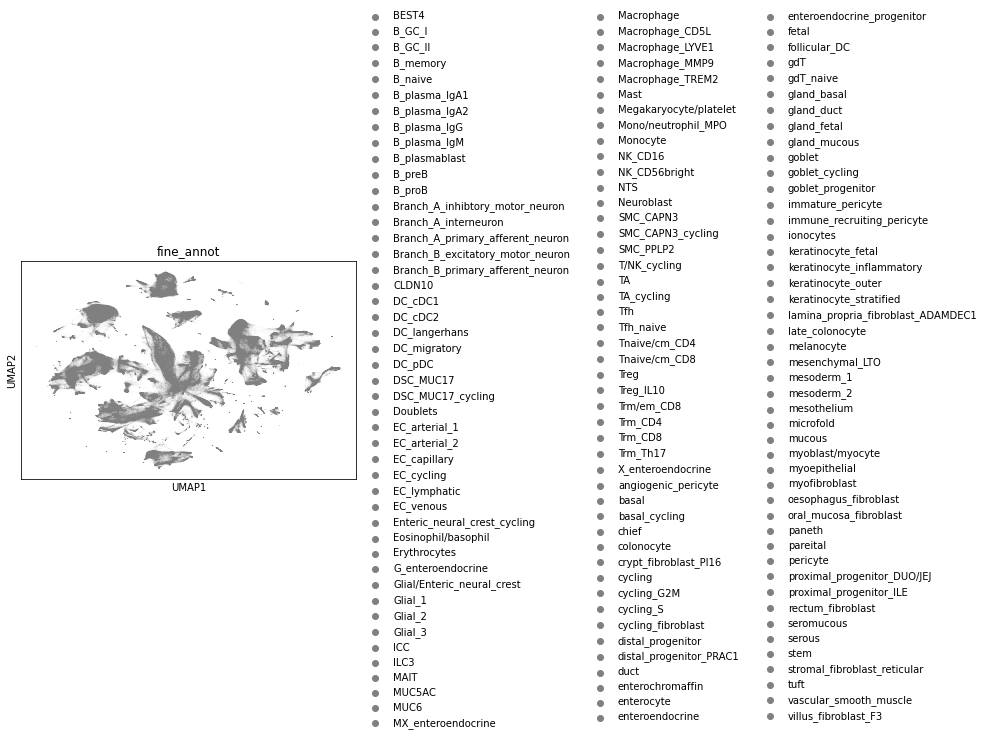

In [68]:
sc.pl.umap(adata,color='fine_annot')

In [69]:
list(adata.obs.fine_annot.unique())

['EC_venous',
 'Mast',
 'EC_capillary',
 'DC_cDC1',
 'Monocyte',
 'DC_cDC2',
 'basal',
 'Treg_IL10',
 'crypt_fibroblast_PI16',
 'Macrophage',
 'vascular_smooth_muscle',
 'lamina_propria_fibroblast_ADAMDEC1',
 'cycling_G2M',
 'keratinocyte_stratified',
 'Trm/em_CD8',
 'pericyte',
 'oral_mucosa_fibroblast',
 'Macrophage_MMP9',
 'EC_lymphatic',
 'rectum_fibroblast',
 'Trm_Th17',
 'DC_migratory',
 'Doublets',
 'cycling_S',
 'Trm_CD4',
 'NK_CD16',
 'Macrophage_LYVE1',
 'Trm_CD8',
 'Macrophage_TREM2',
 'keratinocyte_inflammatory',
 'Tnaive/cm_CD4',
 'DC_pDC',
 'villus_fibroblast_F3',
 'EC_arterial_2',
 'EC_arterial_1',
 'gdT',
 'B_memory',
 'T/NK_cycling',
 'immune_recruiting_pericyte',
 'MAIT',
 'ILC3',
 'melanocyte',
 'Tfh_naive',
 'keratinocyte_outer',
 'EC_cycling',
 'Tnaive/cm_CD8',
 'NK_CD56bright',
 'B_naive',
 'B_preB',
 'Treg',
 'B_proB',
 'B_plasmablast',
 'B_plasma_IgG',
 'Megakaryocyte/platelet',
 'TA_cycling',
 'Mono/neutrophil_MPO',
 'B_plasma_IgA1',
 'Macrophage_CD5L',
 'Tfh',

In [70]:
adata.obs['fine_annot_original'] = adata.obs.fine_annot

In [72]:
adata.obs['fine_annot'] = (
    adata.obs["fine_annot"]
    .map(lambda x: {
 'basal':'Basal',
 'crypt_fibroblast_PI16':'Crypt_fibroblast_PI16',
 'vascular_smooth_muscle':'Vascular_smooth_muscle',
 'lamina_propria_fibroblast_ADAMDEC1':'Lamina_propria_fibroblast_ADAMDEC1',
 'cycling_G2M':'Epithelial_cycling_G2M',
 'keratinocyte_stratified':'Keratinocyte_stratified',
 'pericyte':'Pericyte',
 'oral_mucosa_fibroblast':'Oral_mucosa_fibroblast',
 'rectum_fibroblast':'Rectum_fibroblast',
 'cycling_S':'Epithelial_cycling_S',
 'keratinocyte_inflammatory':'Keratinocyte_inflammatory',
 'villus_fibroblast_F3':'Villus_fibroblast_F3',
 'immune_recruiting_pericyte':'Immune_recruiting_pericyte',
 'melanocyte':'Melanocyte',
 'keratinocyte_outer':'Keratinocyte_outer',
 'oesophagus_fibroblast':'Oesophagus_fibroblast',
 'stromal_fibroblast_reticular':'Fibroblast_reticular',
 'follicular_DC':'Follicular_DC',
 'microfold':'Microfold',
 'enterocyte':'Enterocyte',
 'stem':'Epithelial_stem',
 'cycling':'Cycling',
 'pareital':'Pareital',
 'MX_enteroendocrine':'Enteroendocrine_MX',
 'myofibroblast':'Myofibroblast',
 'enterochromaffin':'Enterochromaffin',
 'chief':'Chief',
 'G_enteroendocrine':'Enteroendocrine_G',
 'goblet_progenitor':'Goblet_progenitor',
 'goblet':'Goblet',
 'enteroendocrine':'Enteroendocrine',
 'X_enteroendocrine':'Enteroendocrine_X',
 'goblet_cycling':'Goblet_cycling',
 'tuft':'Tuft',
 'paneth':'Paneth',
 'serous':'Serous',
 'mucous':'Mucous',
 'duct':'Duct',
 'seromucous':'Seromucous',
 'myoepithelial':'Myoepithelial',
 'ionocytes':'Ionocytes',
 'colonocyte':'Colonocyte',
 'late_colonocyte':'Late_colonocyte',
 'mesoderm_2':'Mesoderm_2',
 'cycling_fibroblast':'Cycling_fibroblast',
 'mesoderm_1':'Mesoderm_1',
 'proximal_progenitor_DUO/JEJ':'Proximal_progenitor_DUO/JEJ',
 'proximal_progenitor_ILE':'Proximal_progenitor_ILE',
 'enteroendocrine_progenitor':'Enteroendocrine_progenitor',
 'mesothelium':'Mesothelium',
 'distal_progenitor':'Distal_progenitor',
 'angiogenic_pericyte':'Angiogenic_pericyte',
 'distal_progenitor_PRAC1':'Distal_progenitor_PRAC1',
 'immature_pericyte':'Immature_pericyte',
 'mesenchymal_LTO':'Mesenchymal_LTO',
 'fetal':'Gastric_fetal_epithelial',
 'gland_basal':'Gland_basal',
 'gland_fetal':'Gland_fetal',
 'basal_cycling':'Basal_cycling',
 'keratinocyte_fetal':'Keratinocyte_fetal',
 'gland_duct':'Gland_duct',
 'gland_mucous':'Gland_mucous',
 'myoblast/myocyte':'Myoblast/myocyte'
                   }.get(x, x))
    .astype("category")
)

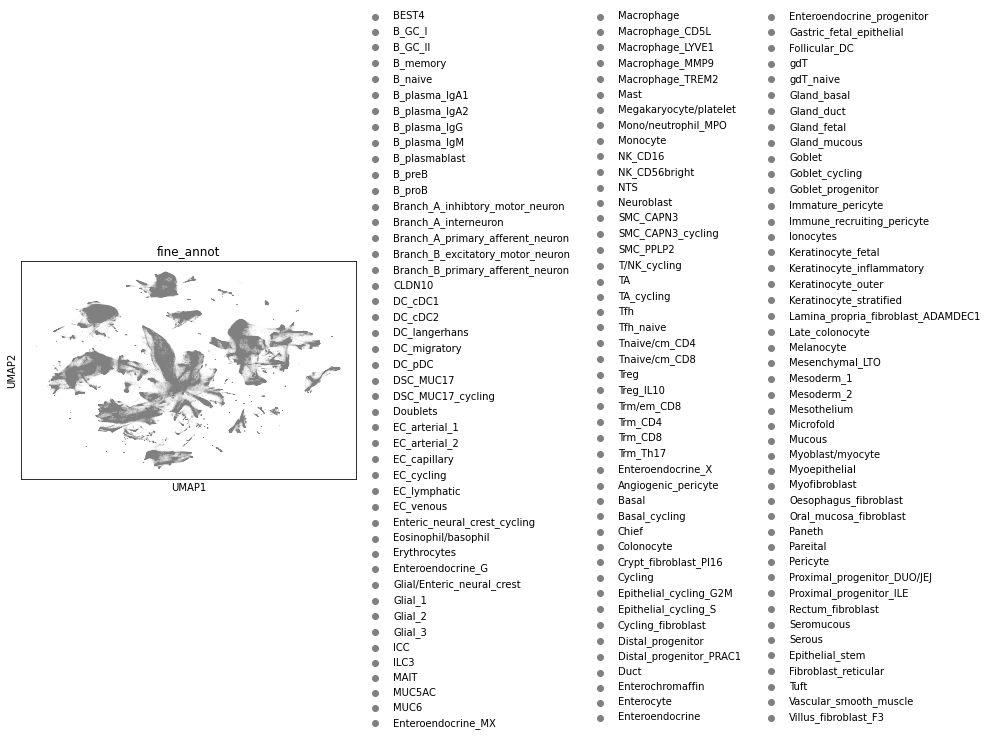

In [73]:
sc.pl.umap(adata,color='fine_annot')

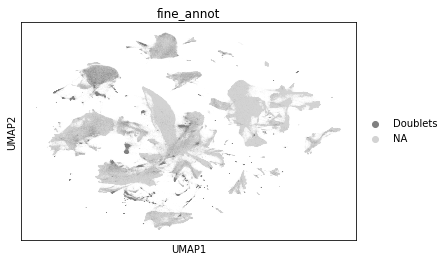

In [3]:
sc.pl.umap(adata,color='fine_annot',groups='Doublets')

In [74]:
adata.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.raw.subsetted.manual_doublet.fine_annot.20230110.h5ad')

In [3]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.raw.subsetted.manual_doublet.fine_annot.20230110.h5ad')

In [4]:
adata.obs.fine_annot.value_counts()

Doublets                    142687
Enterocyte                   66321
Keratinocyte_stratified      63400
B_plasma_IgA1                54360
Mesoderm_2                   53169
                             ...  
Eosinophil/basophil             70
Ionocytes                       67
Gland_mucous                    53
Gastric_fetal_epithelial        29
Megakaryocyte/platelet           4
Name: fine_annot, Length: 138, dtype: int64

In [5]:
adata.obs['fine_annot'].to_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/fine_annot_allcells_20230116.csv')

In [7]:
adata.obs['donorIDunified_study'] = adata.obs['donorID_unified'].astype(str) + '_' + adata.obs['study'].astype(str)

In [8]:
adata.obs.donorID_unified.value_counts()

D11    45773
D12    45263
F13    33228
F16    31055
D99    30872
       ...  
D61      424
D67      399
D93      293
D64      272
F31       95
Name: donorID_unified, Length: 173, dtype: int64

In [9]:
adata.obs.donorIDunified_study.value_counts()

D11_Elmentaite2021           45773
D12_Elmentaite2021           45263
F13_Elmentaite2021           33228
F16_Elmentaite2021           31055
D99_CBTM_unpublished         30872
                             ...  
D61_Caetano2021                424
D67_Pagella2021                399
D93_Jeong2021                  293
D64_Pagella2021                272
F31_Newcastle_unpublished       95
Name: donorIDunified_study, Length: 179, dtype: int64

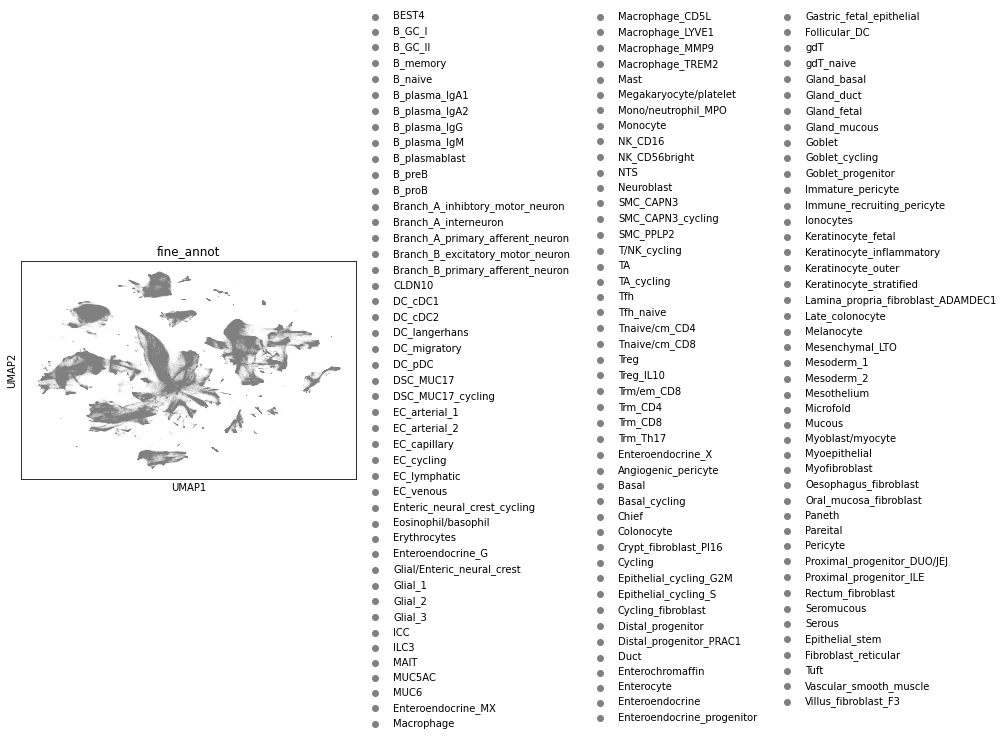

In [4]:
adata_nodoublets = adata[~adata.obs.fine_annot.isin(['Doublets'])].copy()
sc.pl.umap(adata_nodoublets,color='fine_annot')

In [6]:
adata_nodoublets.X.max()

9.188297

In [7]:
#recover raw
adata_nodoublets.X = adata_nodoublets.layers['counts']

In [8]:
adata_nodoublets.X.max()

40699.0

In [9]:
adata_nodoublets.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.raw.subsetted.manual_doublet_removed.fine_annot.20230110.h5ad')

In [10]:
adata

AnnData object with n_obs × n_vars = 1219928 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [11]:
adata.obs.donor_category.value_counts()

control    862937
inutero    346576
preterm     10415
Name: donor_category, dtype: int64

In [13]:
adata_adult = adata[adata.obs.donor_category.isin(['control'])].copy()

In [14]:
adata_adult.obs.donor_category.value_counts()

control    862937
Name: donor_category, dtype: int64

In [15]:
adata_adult.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.raw.subsetted.manual_doublet_removed.fine_annot.adult_only.20230110.h5ad')

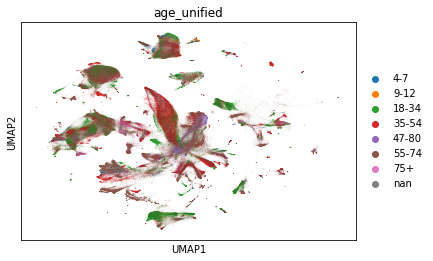

In [16]:
sc.pl.umap(adata_adult,color='age_unified')

### Now take scvi output and make UMAP of all data without doublets (~1.1M cells)

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sc.logging.print_header()

scanpy==1.7.1 anndata==0.8.0 umap==0.4.6 numpy==1.20.1 scipy==1.6.1 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [2]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.raw.subsetted.manual_doublet_removed.fine_annot.20230110.h5ad')
adatascvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/scvi_output20230111/pooled_healthy.hvg7500_noCC.nodoublets.scvi_output.20230110.csv.gz', 
                 compression='gzip',index_col='index')
adata.obsm["X_scvi"] = adatascvi


NameError: name 'T' is not defined

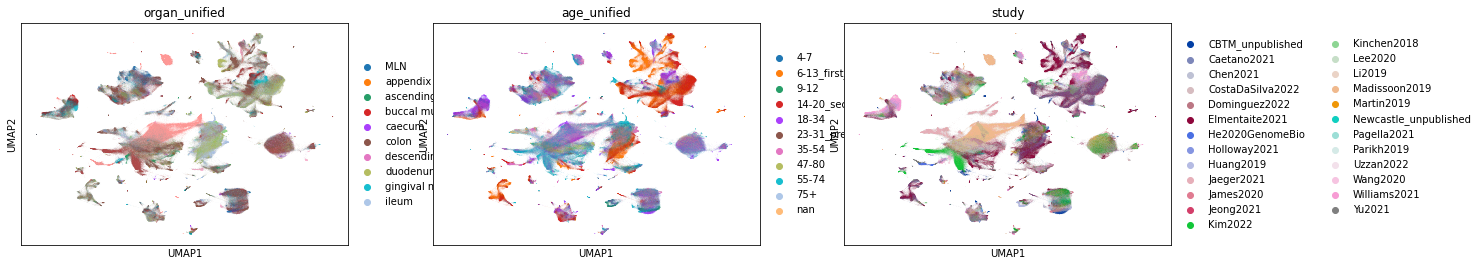

In [3]:
sc.pp.neighbors(
            adata,
            use_rep="X_scvi",
            n_pcs=adata.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(adata, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(adata, color=['organ_unified', 'age_unified','study'])

In [5]:
adata.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.raw.subsetted.manual_doublet_removed.fine_annot.scvi_output.hvg7500_noCC.20230110.h5ad')

## 16/1/23 
## After scvi rerun without study as a covariate

In [3]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.raw.subsetted.manual_doublet_removed.fine_annot.20230110.h5ad')

In [5]:
adatascvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/scvi_output20230116/pooled_healthy.hvg7500_noCC.nodoublets.scvi_output.20230113.csv.gz', 
                 compression='gzip',index_col='index')
adata.obsm["X_scvi"] = adatascvi

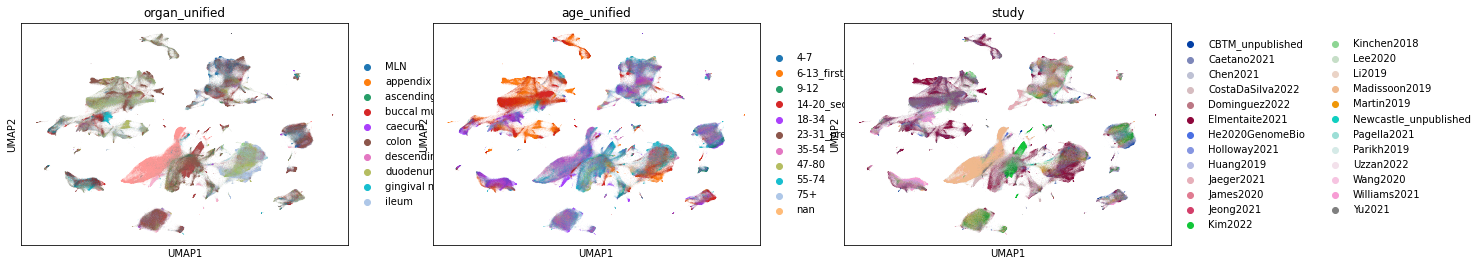

In [6]:
sc.pp.neighbors(
            adata,
            use_rep="X_scvi",
            n_pcs=adata.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(adata, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(adata, color=['organ_unified', 'age_unified','study'])

In [7]:
adata.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.raw.subsetted.manual_doublet_removed.fine_annot.scvi_output_nocategoricalcovar.hvg7500_noCC.20230116.h5ad',compression="gzip")

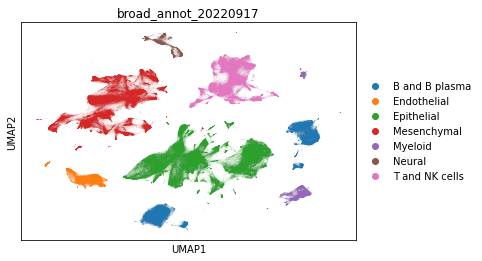

In [8]:
sc.pl.umap(adata,color='broad_annot_20220917')

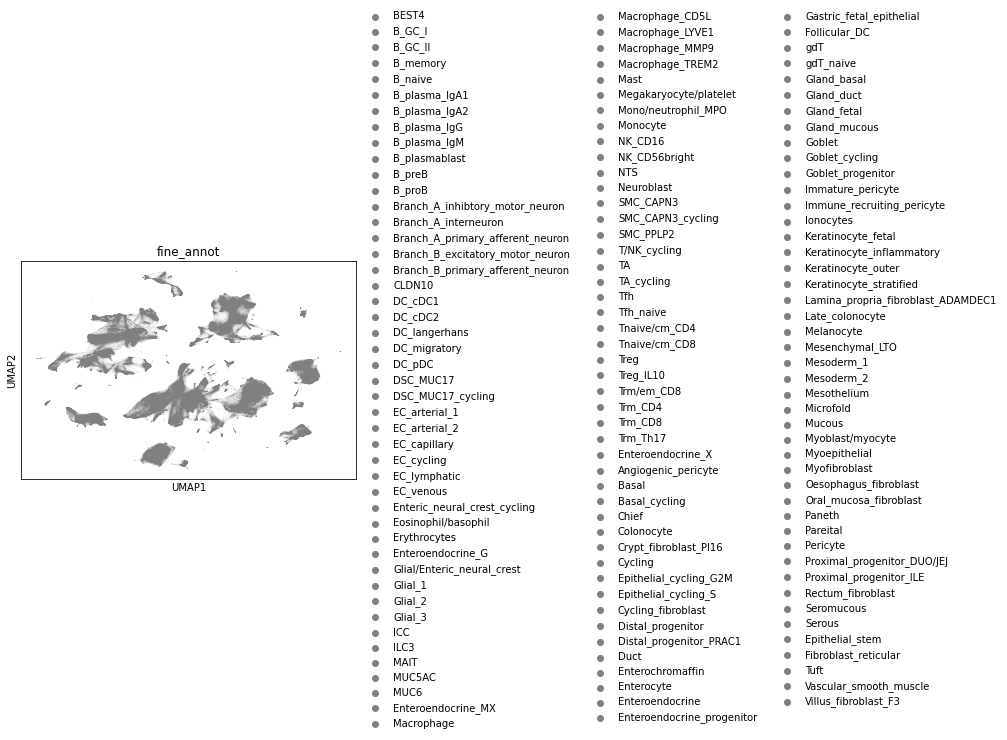

In [9]:
sc.pl.umap(adata,color='fine_annot')

In [11]:
adata.obs['fine_annot'].to_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/fine_annot_allcells_20230116.csv')

In [10]:
bdata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.raw.subsetted.manual_doublet_removed.fine_annot.scvi_output_nocategoricalcovar.hvg7500_noCC.20230116.h5ad')

KeyboardInterrupt: 

### Testing scanvi on all data with 10-15k HVG, make umap from scvi latent space

In [2]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.raw.subsetted.manual_doublet_removed.fine_annot.20230110.h5ad')

BadGzipFile: Not a gzipped file (b'\x89H')

In [3]:
adata

AnnData object with n_obs × n_vars = 1077241 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [4]:
adatascvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/scvi_output20230116/pooled_healthy.hvg10000_noCC.nodoublets.scvi_output.20230120.csv.gz', 
                 compression='gzip',index_col='index')
adata.obsm["X_scvi"] = adatascvi

In [ ]:
sc.pp.neighbors(
            adata,
            use_rep="X_scvi",
            n_pcs=adata.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(adata, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(adata, color=['organ_unified', 'age_unified','study'])

In [ ]:
adata.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/scanvi_tests/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.raw.subsetted.manual_doublet_removed.fine_annot.scvi_output.hvg10000_noCC_nocatcovar.20230122.h5ad')

In [ ]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.raw.subsetted.manual_doublet_removed.fine_annot.20230110.h5ad')
adatascvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/scvi_output20230116/pooled_healthy.hvg15000_noCC.nodoublets.scvi_output.20230120.csv.gz', 
                 compression='gzip',index_col='index')
adata.obsm["X_scvi"] = adatascvi


In [ ]:
sc.pp.neighbors(
            adata,
            use_rep="X_scvi",
            n_pcs=adata.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(adata, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(adata, color=['organ_unified', 'age_unified','study'])

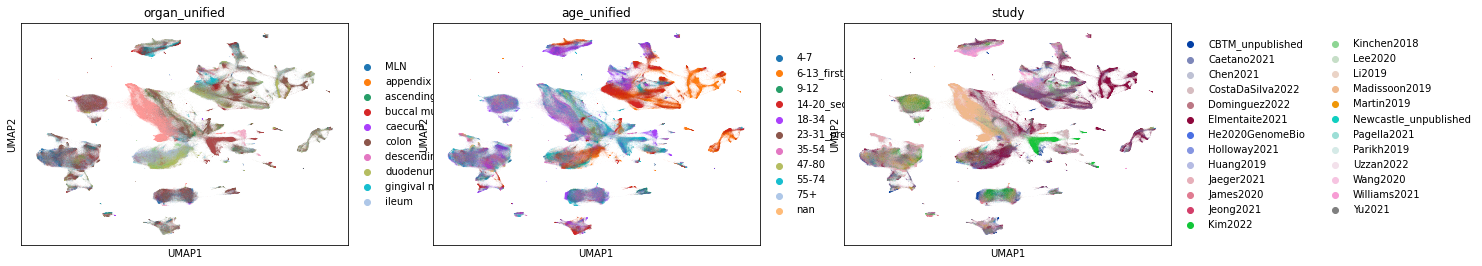

In [10]:
sc.pl.umap(adata, color=['organ_unified', 'age_unified','study'])

In [ ]:
adata.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/scanvi_tests/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.raw.subsetted.manual_doublet_removed.fine_annot.scvi_output.hvg15000_noCC_nocatcovar.20230122.h5ad')